# Multi-region spot instance simulator

Problem: you start in a region; figure out the policy on preemption  (i.e., to which region you switch, if any)?

* Assume: Preemption is a poisson process with probability p, different p for each region
* Assume: jobs are infinite length, with no checkpoint (TODO: maybe also assume checkpoint)

# Policies implemented
* Random - randomly picks a region


### What do we want to measure?
* Number of preemptions?
* Max progress made (max(time spent on a single region before getting preempted))


In [1]:
from simulator import Environment, Job, Region, Scheduler
import matplotlib.pyplot as plt
import copy

## Define jobs and regions

In [2]:
TOTAL_TIME = 100
N_JOBS = 2

SCHED_POLICY = 'random'  # random, least_loaded

regions = [Region(name="r1", p=0), # No preemption, ideal region to start with
           Region(name="r2", p=0.1),
           Region(name="r3", p=0.1)]
jobs = [Job(f"job{i}", None) for i in range(0,N_JOBS)]

## Define environment

In [3]:
env = Environment(regions)
for j in jobs:
    env.add_job(j)

# Run simulator

In [4]:
for i in range(TOTAL_TIME):
    env.tick()

t=1: Scheduled job0 to r3
t=1: Scheduled job1 to r1
t=2: Scheduled job0 to r3
t=13: Scheduled job0 to r3
t=17: Scheduled job0 to r2
t=19: Scheduled job0 to r2
t=32: Scheduled job0 to r3
t=44: Scheduled job0 to r2
t=57: Scheduled job0 to r2
t=63: Scheduled job0 to r1


In [18]:
def compute_segment_lengths(jobs):
    jobwise_seg_lengths = {}
    for job in jobs:
        hist = job.history
        segment_lengths = {}
        curr_seg = hist[0]
        curr_seg_len = 0
        for i in range(0, len(hist)):
            # If name of region is the same
            if hist[i][1] == curr_seg[1]:
                curr_seg_len += 1
            else:
                segment_lengths[curr_seg] = curr_seg_len
                curr_seg = hist[i]
                curr_seg_len = 1
        segment_lengths[curr_seg] = curr_seg_len
        jobwise_seg_lengths[job] = segment_lengths
    return jobwise_seg_lengths

def plot_max_progress(jobs):
    # Progress is the time spent on a region before getting preempted
    plt.figure(figsize=(5, 3), dpi=150)
    heights = []
    ids = []
    str_ids = []
    seg_lengths = compute_segment_lengths(jobs)
    for i, job in enumerate(jobs):
        heights.append(max(seg_lengths[job].values()))
        ids.append(i)
        str_ids.append(job.name)
    plt.bar(ids, heights, align='center')
    plt.xticks(ids, str_ids)
    plt.ylabel('Max progress made')
    plt.xlabel('Jobs')


def plot_timeline(jobs):
    plt.figure(figsize=(5, 3), dpi=150)
    for job in jobs:
        hist = copy.deepcopy(job.history)
        x_data = []
        y_data = []
        x_data, y_data = map(list, zip(*hist))
        plt.plot(x_data,y_data, label=job.name)
    plt.title('Simulator timeline')
    plt.ylabel('Region')
    plt.xlabel('Time')
    plt.legend()

def plot_num_preemptions(jobs):
    plt.figure(figsize=(5, 3), dpi=150)
    heights = []
    ids = []
    str_ids = []
    for i, job in enumerate(jobs):
        heights.append(job.num_preemptions)
        ids.append(i)
        str_ids.append(job.name)
    plt.bar(ids, heights, align='center')
    plt.xticks(ids, str_ids)
    plt.ylabel('Number of preemptions')
    plt.xlabel('Jobs')

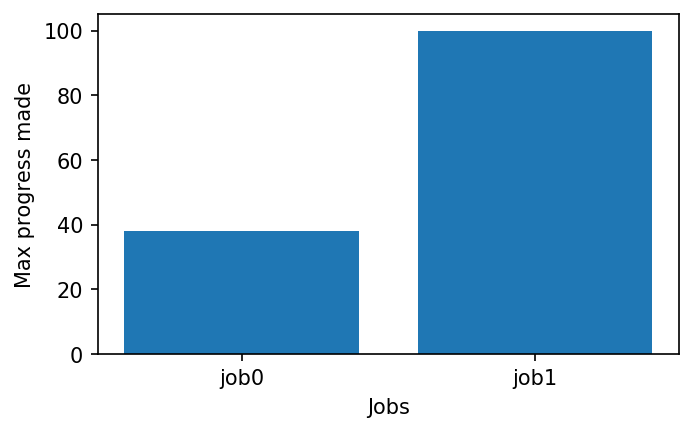

In [19]:
plot_max_progress(jobs)

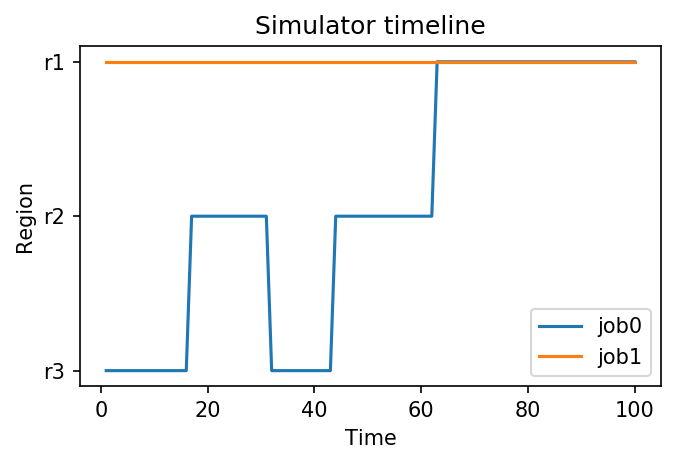

In [20]:
plot_timeline(jobs)

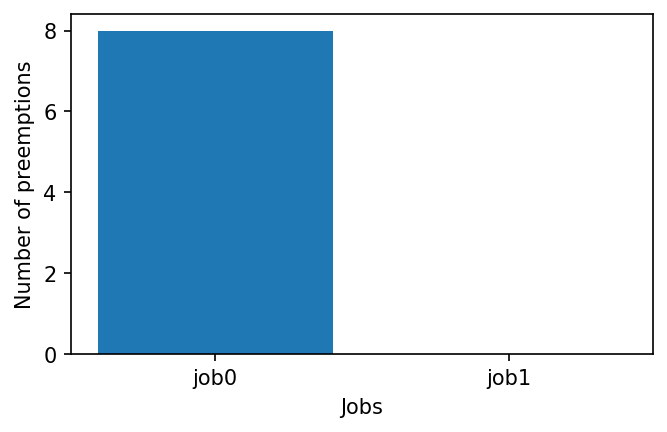

In [21]:
plot_num_preemptions(jobs)